<a href="https://colab.research.google.com/github/ghosesuvendu/dataScience/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Simple Linear Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [3]:
# Importing the dataset
import io
dataset = pd.read_csv(io.BytesIO(uploaded['Salary_Data.csv']))


In [4]:
dataset.shape

(30, 2)

In [5]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [7]:
y


array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 42)


In [9]:
X_test

array([[ 9.6],
       [ 4.9],
       [ 8.2],
       [ 5.3],
       [ 3.2],
       [ 3.7],
       [10.3],
       [ 8.7],
       [ 4. ],
       [ 1.1]])

In [10]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [11]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_train_pred  = regressor.predict(X_train)

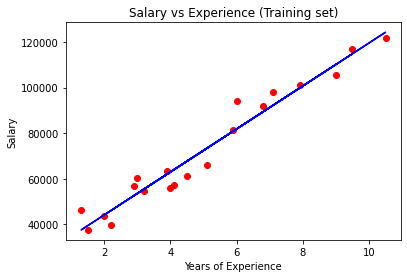

In [12]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

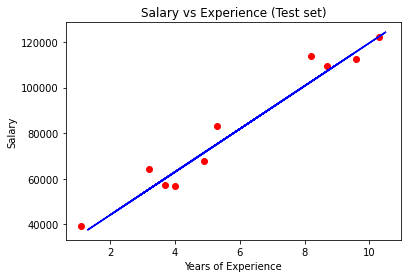

In [13]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [14]:
df = pd.DataFrame({'test': y_test, 'predicted': y_pred})

df.sample(10)

,test,predicted
8,56957.0,63028.490456
3,83088.0,75282.340855
7,109431.0,107330.872670
5,57189.0,60200.678825
2,113812.0,102617.853286
1,67938.0,71511.925348
4,64445.0,55487.659440
6,122391.0,122412.534701
9,39343.0,35692.978025
0,112635.0,115814.307562


In [15]:
from sklearn.metrics import r2_score

score = r2_score(y_train, y_train_pred)

print("Training score : ", score)

Training score :  0.9549236946181227


In [16]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)

print("Testing score : ", score)

Testing score :  0.9553063138044949


In [ ]:
#Salary = 25324.33537924433 + 9426.03876907 * (1.1)

In [ ]:
#salary = regressor.intercept_ + regressor.coef_ * years_of_exp    (Y = B0 + B1*X)

In [17]:
regressor.coef_

array([9426.03876907])

In [18]:
regressor.intercept_

25324.33537924433

In [19]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     381.3
Date:                Fri, 11 Feb 2022   Prob (F-statistic):           1.45e-13
Time:                        12:07:04   Log-Likelihood:                -200.48
No. Observations:                  20   AIC:                             405.0
Df Residuals:                      18   BIC:                             406.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.532e+04   2743.538      9.231      0.0